# DATA COLLECTION AND PREPARATION

In [1]:
import re

In [2]:
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
from cStringIO import StringIO

In [3]:
def convert_pdf_to_txt(path):
    rsrcmgr = PDFResourceManager()
    retstr = StringIO()
    codec = 'utf-8'
    laparams = LAParams()
    device = TextConverter(rsrcmgr, retstr, codec=codec, laparams=laparams)
    fp = file(path, 'rb')
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    password = ""
    maxpages = 0
    caching = True
    pagenos=set()

    for page in PDFPage.get_pages(fp, pagenos, maxpages=maxpages, password=password,caching=caching, check_extractable=True):
        interpreter.process_page(page)

    text = retstr.getvalue()

    fp.close()
    device.close()
    retstr.close()
    return text

In [4]:
lone=convert_pdf_to_txt('doc_3Trademark_Transfer_Agreement.pdf')

In [5]:
f=open('xxx.txt','w')
f.write(lone)
f.close()

In [6]:
with open('xxx.txt') as f:
    clean_cont = f.read().splitlines()

In [7]:
clean_cont

['TRADEMARK AND DOMAIN NAME AGREEMENT ',
 '',
 'This agreement (the \xe2\x80\x9cAgreement\xe2\x80\x9d) is by and between ____________________________ ',
 '',
 ' ',
 ' ',
 '(\xe2\x80\x9cParty\xe2\x80\x9d) and Eclipse Foundation, Inc. (\xe2\x80\x9cEclipse\xe2\x80\x9d) and is effective as of [______] [_____],  ',
 '201[__] (the \xe2\x80\x9cEffective Date\xe2\x80\x9d). ',
 ' ',
 '',
 'WHEREAS, Party is the owner of certain trademarks identified in Exhibit A (the ',
 '',
 '\xe2\x80\x9cTrademarks\xe2\x80\x9d) and of certain domain names identified in Exhibit A (the \xe2\x80\x9cDomain Names\xe2\x80\x9d); ',
 '',
 ' ',
 'WHEREAS, Party is desirous of Eclipse to initiate a project or working group with a ',
 '',
 'name based on the Trademark (the \xe2\x80\x9cProject Initiation\xe2\x80\x9d); ',
 '',
 ' ',
 'WHEREAS, to accommodate the Project Initiation, Party desires to transfer all of Party\xe2\x80\x99s ',
 '',
 'rights, title and interest in and to the Trademarks to Eclipse and to thereafter 

In [8]:
shear=[i.replace('\xe2\x80\x9c','') for i in clean_cont ]
shear=[i.replace('\xe2\x80\x9d','') for i in shear ]
shear=[i.replace('\xe2\x80\x99s','') for i in shear ]

shears = [x for x in shear if x != ' ']
shearss = [x for x in shears if x != '']

In [9]:
shear

['TRADEMARK AND DOMAIN NAME AGREEMENT ',
 '',
 'This agreement (the Agreement) is by and between ____________________________ ',
 '',
 ' ',
 ' ',
 '(Party) and Eclipse Foundation, Inc. (Eclipse) and is effective as of [______] [_____],  ',
 '201[__] (the Effective Date). ',
 ' ',
 '',
 'WHEREAS, Party is the owner of certain trademarks identified in Exhibit A (the ',
 '',
 'Trademarks) and of certain domain names identified in Exhibit A (the Domain Names); ',
 '',
 ' ',
 'WHEREAS, Party is desirous of Eclipse to initiate a project or working group with a ',
 '',
 'name based on the Trademark (the Project Initiation); ',
 '',
 ' ',
 'WHEREAS, to accommodate the Project Initiation, Party desires to transfer all of Party ',
 '',
 'rights, title and interest in and to the Trademarks to Eclipse and to thereafter have certain ',
 'continuing usage rights of the Trademarks; ',
 '',
 ' ',
 'WHEREAS, to accommodate the Project Initiation, the Parties may mutually agree to ',
 'have any related 

In [10]:
shears

['TRADEMARK AND DOMAIN NAME AGREEMENT ',
 '',
 'This agreement (the Agreement) is by and between ____________________________ ',
 '',
 '(Party) and Eclipse Foundation, Inc. (Eclipse) and is effective as of [______] [_____],  ',
 '201[__] (the Effective Date). ',
 '',
 'WHEREAS, Party is the owner of certain trademarks identified in Exhibit A (the ',
 '',
 'Trademarks) and of certain domain names identified in Exhibit A (the Domain Names); ',
 '',
 'WHEREAS, Party is desirous of Eclipse to initiate a project or working group with a ',
 '',
 'name based on the Trademark (the Project Initiation); ',
 '',
 'WHEREAS, to accommodate the Project Initiation, Party desires to transfer all of Party ',
 '',
 'rights, title and interest in and to the Trademarks to Eclipse and to thereafter have certain ',
 'continuing usage rights of the Trademarks; ',
 '',
 'WHEREAS, to accommodate the Project Initiation, the Parties may mutually agree to ',
 'have any related Domain Names initially redirect to a

In [11]:
shearss

['TRADEMARK AND DOMAIN NAME AGREEMENT ',
 'This agreement (the Agreement) is by and between ____________________________ ',
 '(Party) and Eclipse Foundation, Inc. (Eclipse) and is effective as of [______] [_____],  ',
 '201[__] (the Effective Date). ',
 'WHEREAS, Party is the owner of certain trademarks identified in Exhibit A (the ',
 'Trademarks) and of certain domain names identified in Exhibit A (the Domain Names); ',
 'WHEREAS, Party is desirous of Eclipse to initiate a project or working group with a ',
 'name based on the Trademark (the Project Initiation); ',
 'WHEREAS, to accommodate the Project Initiation, Party desires to transfer all of Party ',
 'rights, title and interest in and to the Trademarks to Eclipse and to thereafter have certain ',
 'continuing usage rights of the Trademarks; ',
 'WHEREAS, to accommodate the Project Initiation, the Parties may mutually agree to ',
 'have any related Domain Names initially redirect to a URL designated by Eclipse and that the ',
 '

In [12]:
dubby=[re.sub("[^a-zA-Z]+", " ", s) for s in shearss]

In [13]:
dubby

['TRADEMARK AND DOMAIN NAME AGREEMENT ',
 'This agreement the Agreement is by and between ',
 ' Party and Eclipse Foundation Inc Eclipse and is effective as of ',
 ' the Effective Date ',
 'WHEREAS Party is the owner of certain trademarks identified in Exhibit A the ',
 'Trademarks and of certain domain names identified in Exhibit A the Domain Names ',
 'WHEREAS Party is desirous of Eclipse to initiate a project or working group with a ',
 'name based on the Trademark the Project Initiation ',
 'WHEREAS to accommodate the Project Initiation Party desires to transfer all of Party ',
 'rights title and interest in and to the Trademarks to Eclipse and to thereafter have certain ',
 'continuing usage rights of the Trademarks ',
 'WHEREAS to accommodate the Project Initiation the Parties may mutually agree to ',
 'have any related Domain Names initially redirect to a URL designated by Eclipse and that the ',
 'Domain Names are subsequently transferred to Eclipse ',
 'In consideration of the

# TOPIC MODELLING

In [14]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd
import numpy as np
%pylab
%matplotlib inline


Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


/Users/mac/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [15]:
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS

In [16]:
vect=CountVectorizer(ngram_range=(1,1),stop_words='english')

In [17]:
dtm=vect.fit_transform(dubby)

In [18]:
dtm

<172x326 sparse matrix of type '<type 'numpy.int64'>'
	with 647 stored elements in Compressed Sparse Row format>

In [19]:
pd.DataFrame(dtm.toarray(),columns=vect.get_feature_names())

,accommodate,accordance,acknowledged,action,actions,additional,address,advised,affiliated,aggrieved,...,warrants,warranty,way,whereof,witness,working,writing,written,www,york
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
lda=LatentDirichletAllocation(n_components=5)

In [21]:
lda.fit_transform(dtm)

/Users/mac/anaconda2/lib/python2.7/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


array([[ 0.05329139,  0.05059695,  0.05005699,  0.79520734,  0.05084733],
       [ 0.06669009,  0.06667187,  0.06667353,  0.06805058,  0.73191392],
       [ 0.03335182,  0.03333974,  0.03372477,  0.8657353 ,  0.03384837],
       [ 0.06669106,  0.06668148,  0.06667707,  0.73327211,  0.06667828],
       [ 0.02862748,  0.02860521,  0.02975165,  0.02960631,  0.88340936],
       [ 0.02225417,  0.02228645,  0.02285453,  0.91005783,  0.02254701],
       [ 0.02514063,  0.0250254 ,  0.89882969,  0.02565545,  0.02534883],
       [ 0.83828493,  0.04008682,  0.04025166,  0.040989  ,  0.04038759],
       [ 0.02532514,  0.02519066,  0.0253681 ,  0.02594735,  0.89816875],
       [ 0.03336741,  0.03334475,  0.86579927,  0.03389089,  0.03359768],
       [ 0.04007154,  0.04002848,  0.83938025,  0.04041877,  0.04010096],
       [ 0.02889157,  0.02860697,  0.02864282,  0.88481588,  0.02904277],
       [ 0.02224194,  0.02252592,  0.02240722,  0.91057681,  0.02224811],
       [ 0.03334829,  0.03340819,  0.0

In [22]:
lda_dtf=lda.fit_transform(dtm)

/Users/mac/anaconda2/lib/python2.7/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


In [23]:
import numpy as np
sorting=np.argsort(lda.components_)[:,::-1]
features=np.array(vect.get_feature_names())

In [60]:
import mglearn
mglearn.tools.print_topics(topics=range(5), feature_names=features,
sorting=sorting, topics_per_chunk=5, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
page          agreement     trademarks    domain        party         
trademark     parties       party         names         eclipse       
written       signature     shall         title         date          
law           entire        right         eclipse       remedies      
seek          registered    eclipse       trademarks    reg           
additional    obligations   agreement     jurisdiction  dated         
remedies      hereto        assignment    transferred   shall         
past          hereunder     ownership     list          foundation    
mark          hereof        term          supersedes    right         
available     respect       condition     company       rights        




In [43]:
Agreement_Topic=np.argsort(lda_dtf[:,2])[::-1]
for i in Agreement_Topic[:4]:
    print(b".".join(dubby[i].split(b".")[:2]) + b".\n")

Assignment and to issue or transfer said Trademarks to Eclipse as owner of all right title and .

name registrars as may be necessary to vest in and secure unto Eclipse the full right title and .

Party hereby authorizes the Commissioner of Patents and Trademarks of the United States and .

the laws of the State of New York without regard to the conflicts of law .



In [44]:
Domain_Name_Topic=np.argsort(lda_dtf[:,4])[::-1]
for i in Domain_Name_Topic[:4]:
    print(b".".join(dubby[i].split(b".")[:2]) + b".\n")

 http www eclipse org legal logo guidelines php as may be amended from time to time the .

formally approves the Project the Project Effective Date Party shall cause any related .

mail return receipt requested postage prepaid to a party at the address set .

Non Exclusive Remedies The rights and remedies of a party set forth .



# VISUALIZATION OF TOPICS


In [45]:
from __future__ import  print_function
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

In [46]:
zit=pyLDAvis.sklearn.prepare(lda,dtm,vect)

In [47]:
pyLDAvis.show(zit)


Note: if you're in the IPython notebook, pyLDAvis.show() is not the best command
      to use. Consider using pyLDAvis.display(), or pyLDAvis.enable_notebook().
      See more information at http://pyLDAvis.github.io/quickstart.html .

You must interrupt the kernel to end this command

Serving to http://127.0.0.1:8889/    [Ctrl-C to exit]


127.0.0.1 - - [18/Jan/2018 18:25:30] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [18/Jan/2018 18:25:30] "GET /LDAvis.css HTTP/1.1" 200 -
127.0.0.1 - - [18/Jan/2018 18:25:30] "GET /d3.js HTTP/1.1" 200 -
127.0.0.1 - - [18/Jan/2018 18:25:30] "GET /LDAvis.js HTTP/1.1" 200 -



stopping Server...


# WORDCLOUD

In [48]:
%pylab
%matplotlib inline
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [49]:
d = path.dirname(__name__)

In [50]:
text = open(path.join(d, 'xxx.txt')).read()

In [51]:
alice_mask = np.array(Image.open(path.join(d, "Nigeria.png")))

In [52]:
stopwords = set(STOPWORDS)

In [53]:
wc = WordCloud(background_color="black", max_words=2000, mask=alice_mask,stopwords=stopwords)

In [54]:
wc.generate(text)

In [55]:
wc.to_file(path.join(d, "alice.png"))

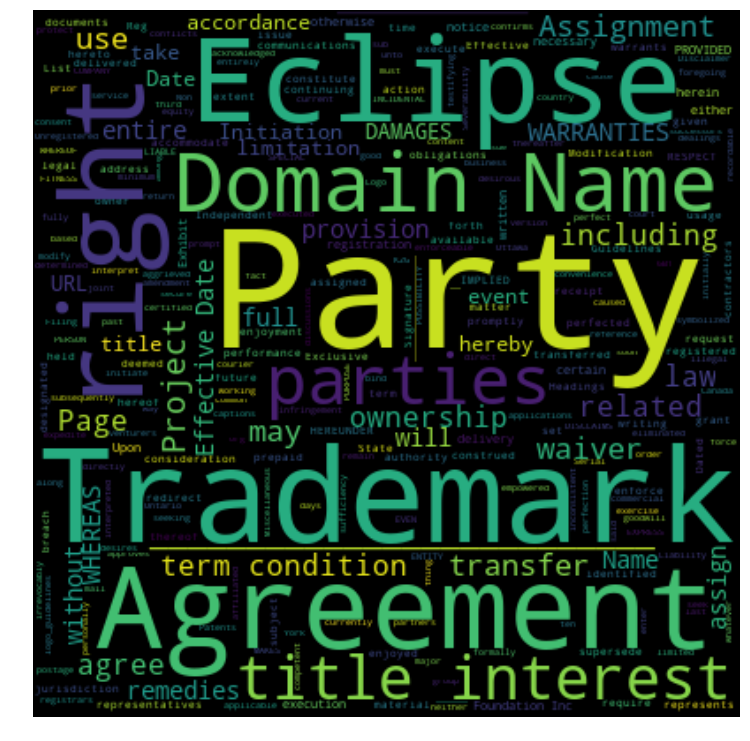

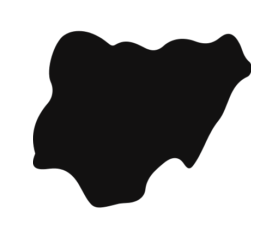

In [59]:
plt.figure(figsize=(16,13))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()